In [158]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [159]:
df  = pd.read_csv("English_Premier_League_Players_Statistics2020-09-24.csv")

print('Shape of the dataset is {}'.format(df .shape))

df .head(1)

Shape of the dataset is (571, 59)


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN


In [160]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

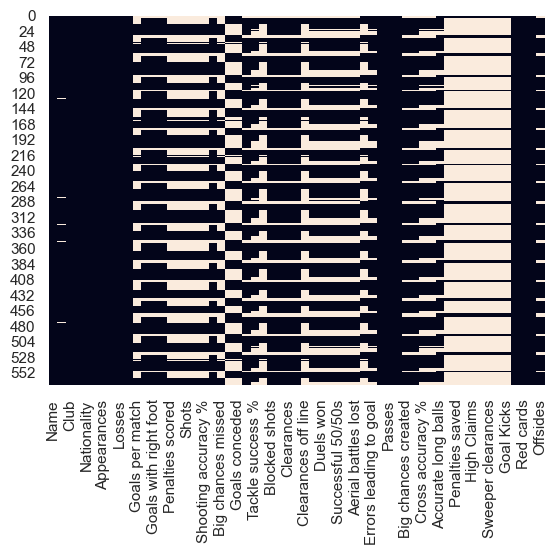

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [162]:
for col in df.columns:  
    if col in df.columns:
        missing = (
            df[col].isna().sum() +                # NaN values
            (df[col] == '').sum() +               # empty strings
            (df[col] == '?').sum()                # literal "?" placeholders
        )
        print(col, missing)

Name 0
Jersey Number 8
Club 0
Position 0
Nationality 1
Age 1
Appearances 0
Wins 0
Losses 0
Goals 0
Goals per match 262
Headed goals 69
Goals with right foot 69
Goals with left foot 69
Penalties scored 262
Freekicks scored 262
Shots 262
Shots on target 262
Shooting accuracy % 262
Hit woodwork 69
Big chances missed 262
Clean sheets 309
Goals conceded 309
Tackles 69
Tackle success % 181
Last man tackles 378
Blocked shots 69
Interceptions 69
Clearances 69
Headed Clearance 69
Clearances off line 378
Recoveries 181
Duels won 181
Duels lost 181
Successful 50/50s 181
Aerial battles won 181
Aerial battles lost 181
Own goals 309
Errors leading to goal 112
Assists 0
Passes 0
Passes per match 0
Big chances created 69
Crosses 69
Cross accuracy % 181
Through balls 181
Accurate long balls 112
Saves 502
Penalties saved 502
Punches 502
High Claims 502
Catches 502
Sweeper clearances 502
Throw outs 502
Goal Kicks 502
Yellow cards 0
Red cards 0
Fouls 0
Offsides 69


In [163]:
#Show Missing values Objects
for col in df.columns:
    if df[col].dtype == object:
        missing = (
            df[col].isna().sum() +                # NaN values
            (df[col] == '').sum() +               # empty strings
            (df[col] == '?').sum()                # literal "?" placeholders
        )
        print(col, missing)

Name 0
Club 0
Position 0
Nationality 1
Shooting accuracy % 262
Tackle success % 181
Cross accuracy % 181


In [164]:
# cleaning the percentage sign
df['Cross accuracy %'] = df['Cross accuracy %'].str.replace(r'%', '').astype(float)
df['Shooting accuracy %'] = df['Shooting accuracy %'].str.replace(r'%', '').astype(float)
df['Tackle success %'] = df['Tackle success %'].str.replace(r'%', '').astype(float)

In [165]:
#Show Missing values Objects
for col in df.columns:
    if df[col].dtype == object:
        missing = (
            df[col].isna().sum() +                # NaN values
            (df[col] == '').sum() +               # empty strings
            (df[col] == '?').sum()                # literal "?" placeholders
        )
        print(col, missing)


Name 0
Club 0
Position 0
Nationality 1


In [166]:
def CatDataQualityReport(data):
    variable_names = []
    total_values = []
    perc_missing_values = []
    unique_value_list = []
    mode = []
    mode_freq = []
    mode_percentage = []
    second_mode = []
    second_mode_freq = []
    second_mode_percentage = []

    for name in data.columns:
        mode_series = data[name].mode()
        dic_value_counts = data[name].value_counts()
        ordered_keys = dic_value_counts.keys()

        variable_names.append(name)
        total_values.append(data[name].size)
        perc_missing_values.append(((data[name].isnull().sum()/data[name].size)*100))
        unique_value_list.append(data[name].unique().size)
        mode.append(mode_series[0])
        mode_freq.append(dic_value_counts[ordered_keys[0]])
        mode_percentage.append(((dic_value_counts[mode_series[0]]/data[name].size)*100))

        if len(ordered_keys) > 1:
            second_mode.append(ordered_keys[1])
            second_mode_freq.append(dic_value_counts[ordered_keys[1]])
            second_mode_percentage.append(f"{((dic_value_counts[ordered_keys[1]]/data[name].size)*100):.2f}")

        else:
            second_mode.append('na')
            second_mode_freq.append('na')
            second_mode_percentage.append('na')

    missing_data=pd.DataFrame({"Feature":variable_names,\
                            "Count":total_values,\
                                "% Miss":perc_missing_values,\
                                "Card.":unique_value_list,\
                                "Mode":mode,\
                                "Mode Freq.":mode_freq,
                                "Mode %":mode_percentage,\
                                "2nd Mode":second_mode ,\
                                "2nd Mode Freq": second_mode_freq,\
                                '2nd Mode %':second_mode_percentage
                                })

    report = missing_data.set_index("Feature")
    report = report.sort_values("% Miss",ascending=False)
    #report = report.sort_values("Card.")

    return report



In [167]:
data_info = CatDataQualityReport(df.select_dtypes(include='object'))
data_info

,Count,% Miss,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Feature,,,,,,,,,
Nationality,571,0.175131,58,England,221,38.704028,France,30,5.25
Name,571,0.000000,571,Aaron Connolly,1,0.175131,Paul Dummett,1,0.18
Club,571,0.000000,20,Liverpool,34,5.954466,Brighton-and-Hove-Albion,33,5.78
Position,571,0.000000,4,Midfielder,198,34.676007,Defender,194,33.98


In [168]:
# Remove entries which do not have nationality 
df = df[df['Nationality'].notna()]

In [185]:
# Fill event counts with 0
event_cols = ['Goals per match','Penalties scored','Freekicks scored','Shots','Shots on target',
              'Hit woodwork','Big chances missed','Clean sheets','Goals conceded','Tackles',
              'Last man tackles','Blocked shots','Interceptions','Clearances','Headed Clearance',
              'Clearances off line','Recoveries','Duels won','Duels lost','Successful 50/50s',
              'Aerial battles won','Aerial battles lost','Own goals','Errors leading to goal',
              'Big chances created','Crosses','Through balls','Accurate long balls','Saves',
              'Penalties saved','Punches','High Claims','Catches','Sweeper clearances',
              'Throw outs','Goal Kicks','Offsides','Headed goals','Goals with right foot','Goals with left foot']
df[event_cols] = df[event_cols].fillna(0)


In [186]:
for col in df.columns:  
    if col in df.columns:
        missing = (
            df[col].isna().sum() +                # NaN values
            (df[col] == '').sum() +               # empty strings
            (df[col] == '?').sum()                # literal "?" placeholders
        )
        print(col, missing)

Name 0
Jersey Number 0
Club 0
Position 0
Nationality 0
Age 0
Appearances 0
Wins 0
Losses 0
Goals 0
Goals per match 0
Headed goals 0
Goals with right foot 0
Goals with left foot 0
Penalties scored 0
Freekicks scored 0
Shots 0
Shots on target 0
Shooting accuracy % 257
Hit woodwork 0
Big chances missed 0
Clean sheets 0
Goals conceded 0
Tackles 0
Tackle success % 178
Last man tackles 0
Blocked shots 0
Interceptions 0
Clearances 0
Headed Clearance 0
Clearances off line 0
Recoveries 0
Duels won 0
Duels lost 0
Successful 50/50s 0
Aerial battles won 0
Aerial battles lost 0
Own goals 0
Errors leading to goal 0
Assists 0
Passes 0
Passes per match 0
Big chances created 0
Crosses 0
Cross accuracy % 178
Through balls 0
Accurate long balls 0
Saves 0
Penalties saved 0
Punches 0
High Claims 0
Catches 0
Sweeper clearances 0
Throw outs 0
Goal Kicks 0
Yellow cards 0
Red cards 0
Fouls 0
Offsides 0


In [170]:
df = df.dropna(subset=['Jersey Number',])

In [171]:
data_info = CatDataQualityReport(df.select_dtypes(include='object'))
data_info

,Count,% Miss,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Feature,,,,,,,,,
Name,562,0.0,562,Aaron Connolly,1,0.177936,Jamaal Lascelles,1,0.18
Club,562,0.0,20,Liverpool,34,6.049822,Brighton-and-Hove-Albion,33,5.87
Position,562,0.0,4,Midfielder,195,34.697509,Defender,191,33.99
Nationality,562,0.0,56,England,218,38.790036,France,30,5.34


In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Jersey Number,562.0,19.551601,14.280548,1.0,8.000,18.000,27.0000,82.0
Age,562.0,25.811388,4.360331,17.0,22.000,26.000,29.0000,38.0
Appearances,562.0,69.839858,82.042483,0.0,4.000,37.500,110.0000,539.0
Wins,562.0,29.398577,39.121382,0.0,1.000,13.000,42.0000,272.0
Losses,562.0,24.240214,28.580641,0.0,2.000,14.000,37.0000,158.0
Goals,562.0,7.441281,16.920310,0.0,0.000,1.000,7.0000,180.0
Goals per match,305.0,2.659541,8.049076,0.0,0.050,0.140,0.3600,57.0
Headed goals,495.0,1.434343,3.453455,0.0,0.000,0.000,1.0000,31.0
Goals with right foot,495.0,4.531313,11.113444,0.0,0.000,1.000,4.0000,127.0
Goals with left foot,495.0,2.418182,6.334539,0.0,0.000,0.000,2.0000,63.0


In [173]:
continous_df = df.select_dtypes(include='number')
con_list = list(continous_df.columns)
print(con_list)

['Jersey Number', 'Age', 'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match', 'Headed goals', 'Goals with right foot', 'Goals with left foot', 'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %', 'Hit woodwork', 'Big chances missed', 'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %', 'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost', 'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists', 'Passes', 'Passes per match', 'Big chances created', 'Crosses', 'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves', 'Penalties saved', 'Punches', 'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides']


In [174]:
cat_df = df.select_dtypes(include='object')
cat_list = list(cat_df.columns)
print(cat_list)

['Name', 'Club', 'Position', 'Nationality']


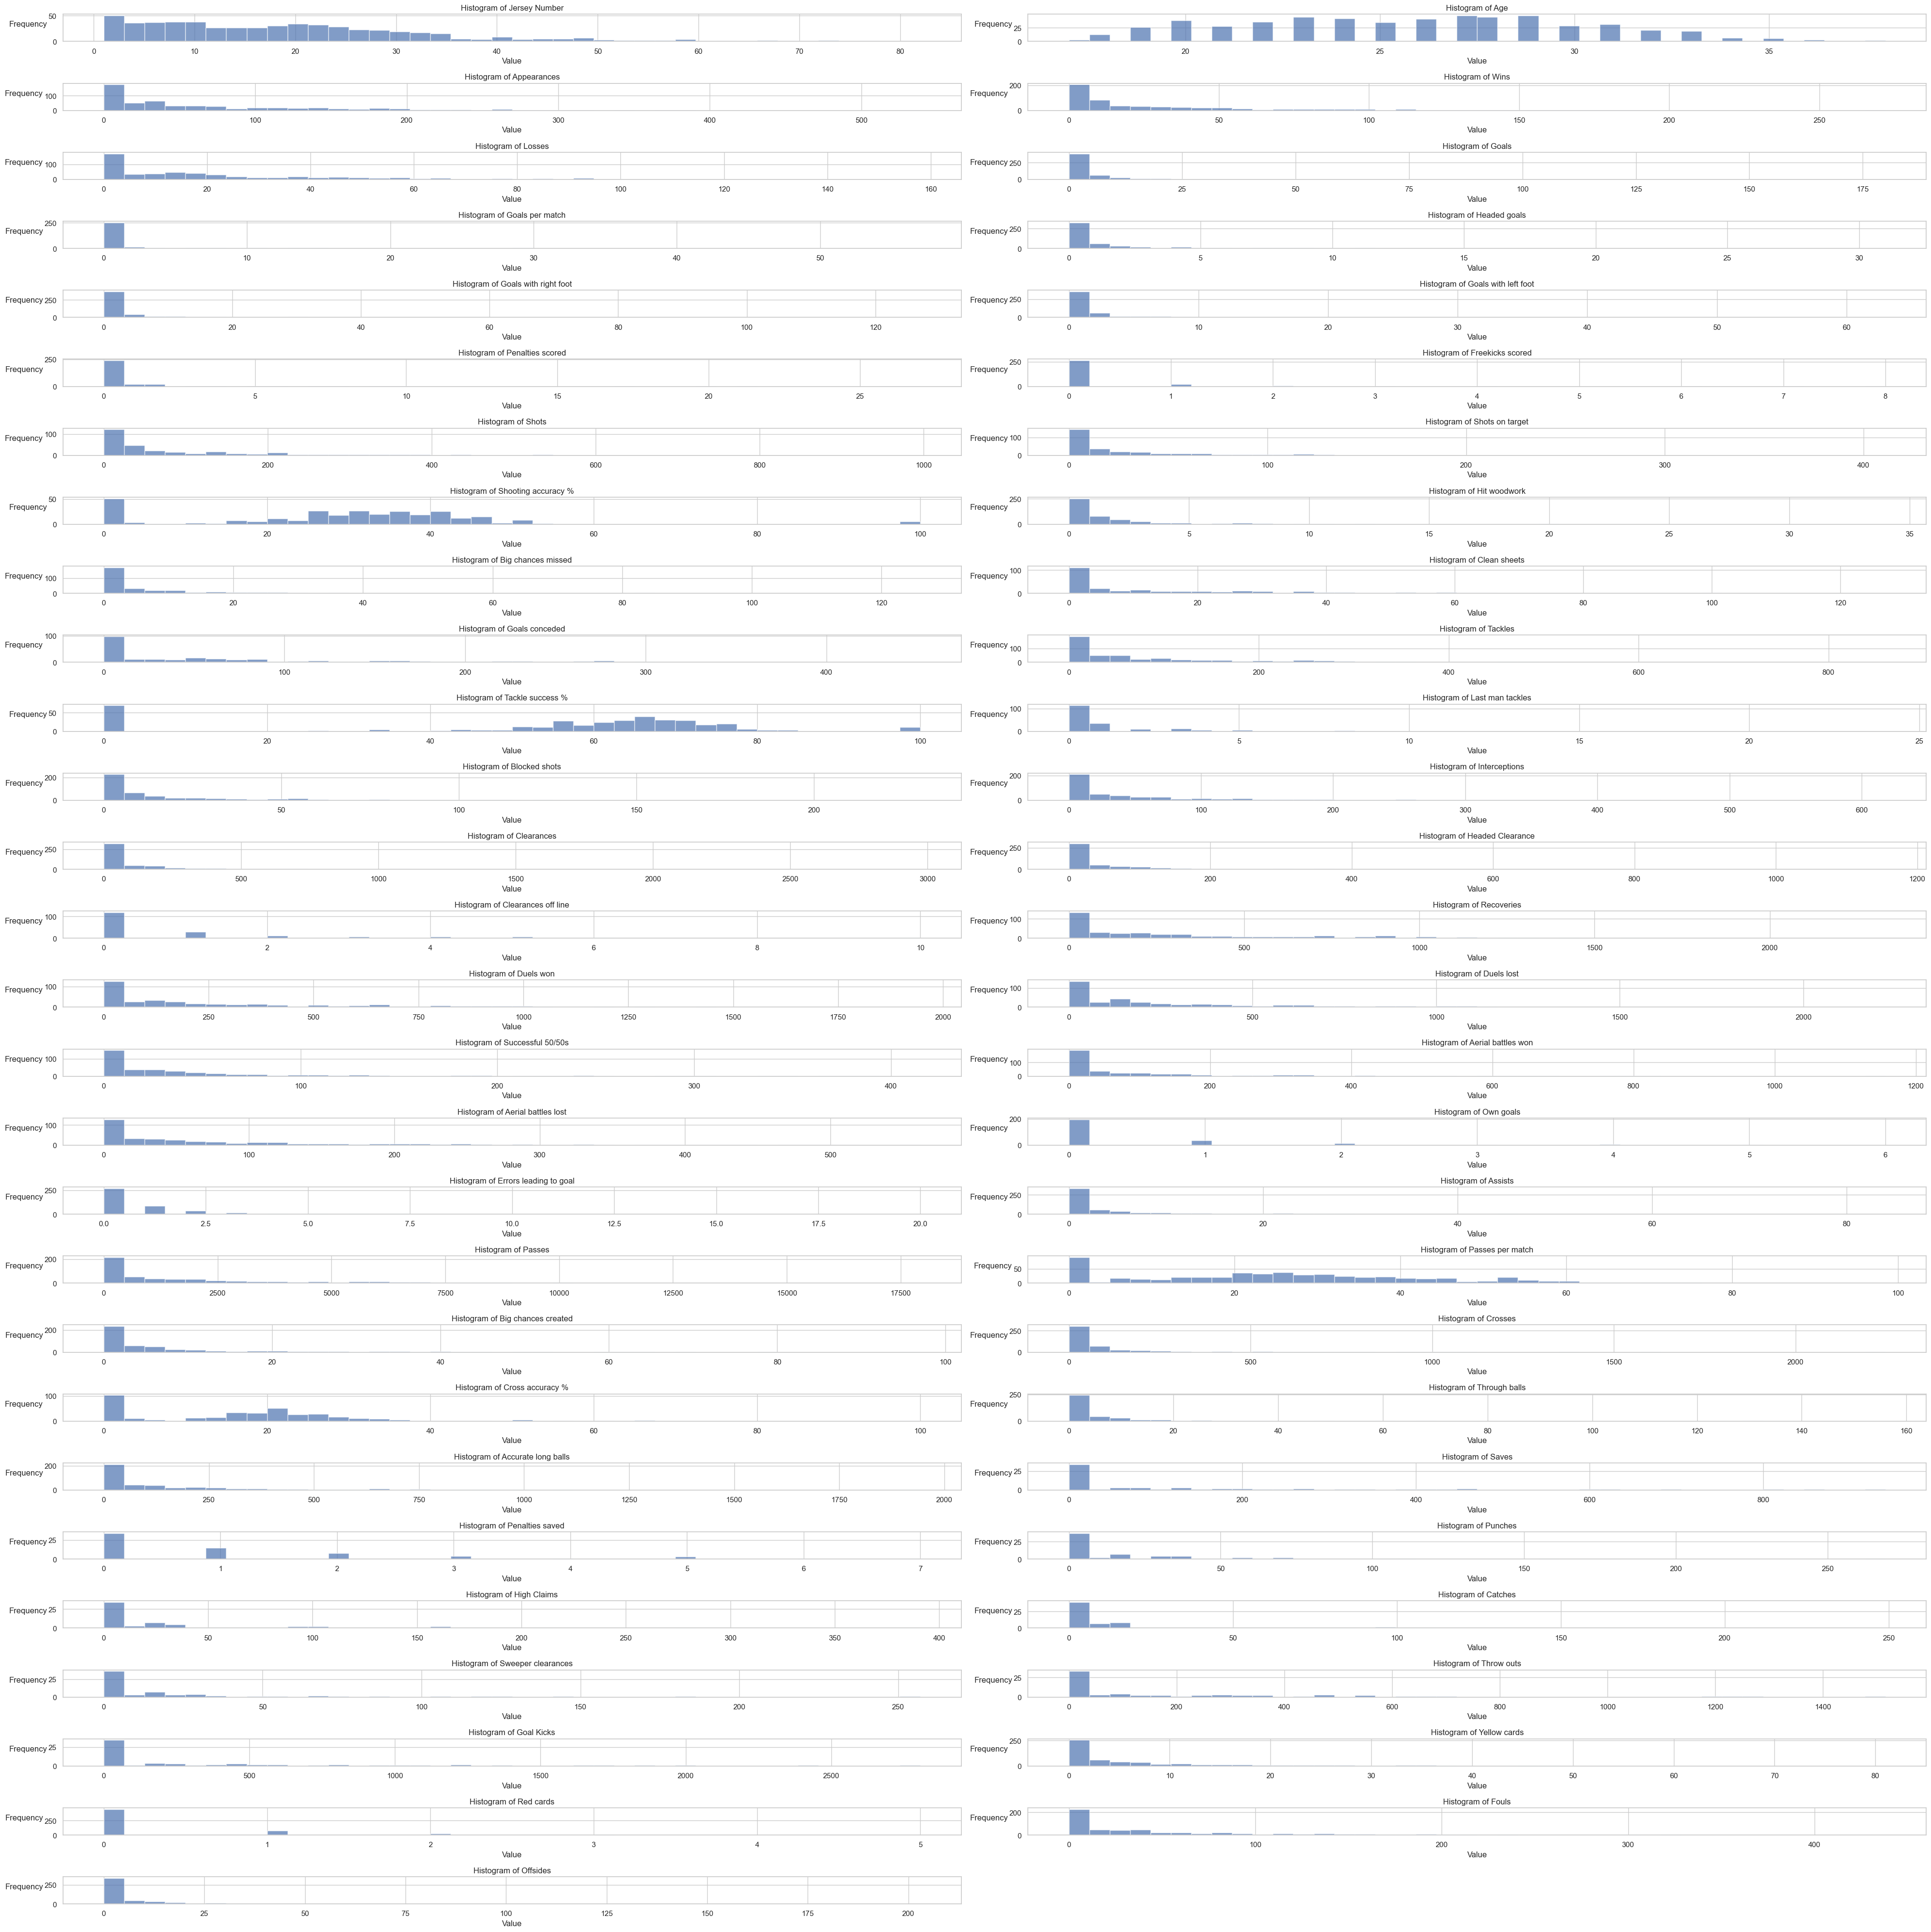

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# Improved histograms
plt.figure(figsize=(40, 40))

# Iterate over each column in con_list
for i, column in enumerate(con_list):
    plt.subplot(len(con_list) // 2 + 1, 2, i + 1)

    # Calculate the range for the current column
    col_min, col_max = df[column].min(), df[column].max()

    # Plot histogram with custom range
    df[column].plot(kind='hist', bins=40, alpha=0.7, range=(col_min, col_max))
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency', rotation=0, labelpad=30)
    plt.grid(True)

    # Save each histogram as an image file
    # plt.savefig(f'histogram_{column}.png')

plt.tight_layout()
# plt.savefig(f'histograms.png')
plt.show()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_14896\4116151521.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




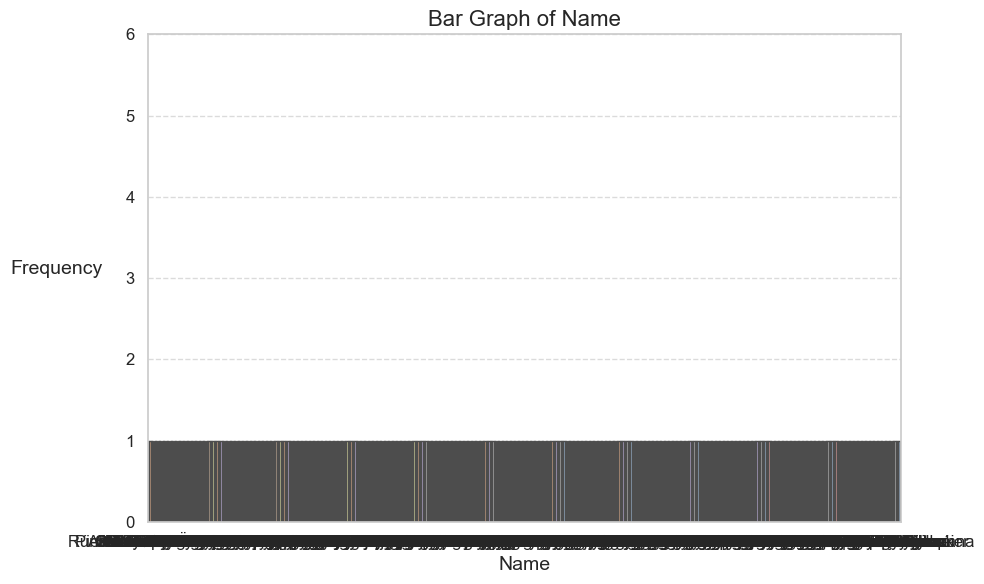

C:\Users\Kevin\AppData\Local\Temp\ipykernel_14896\4116151521.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




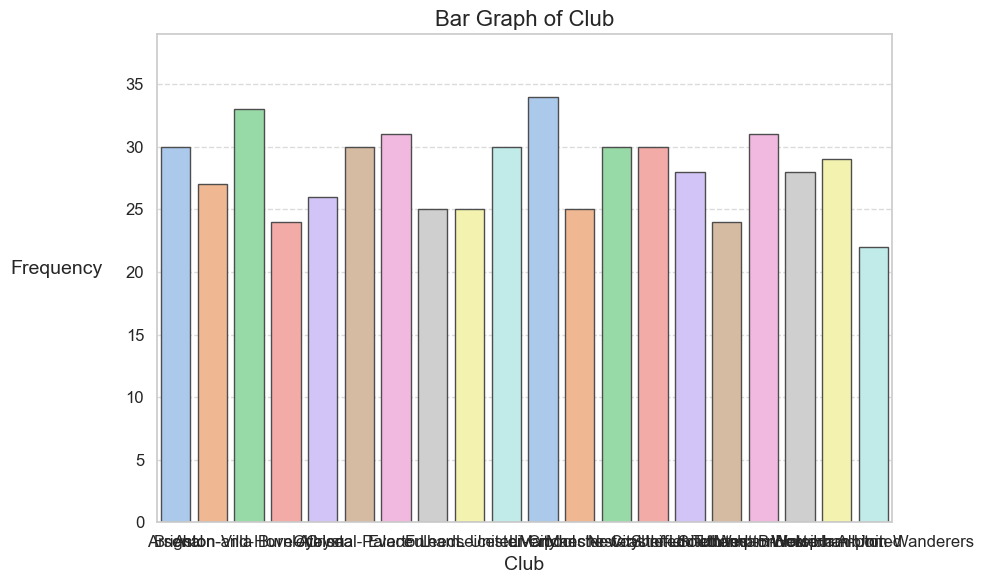

C:\Users\Kevin\AppData\Local\Temp\ipykernel_14896\4116151521.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




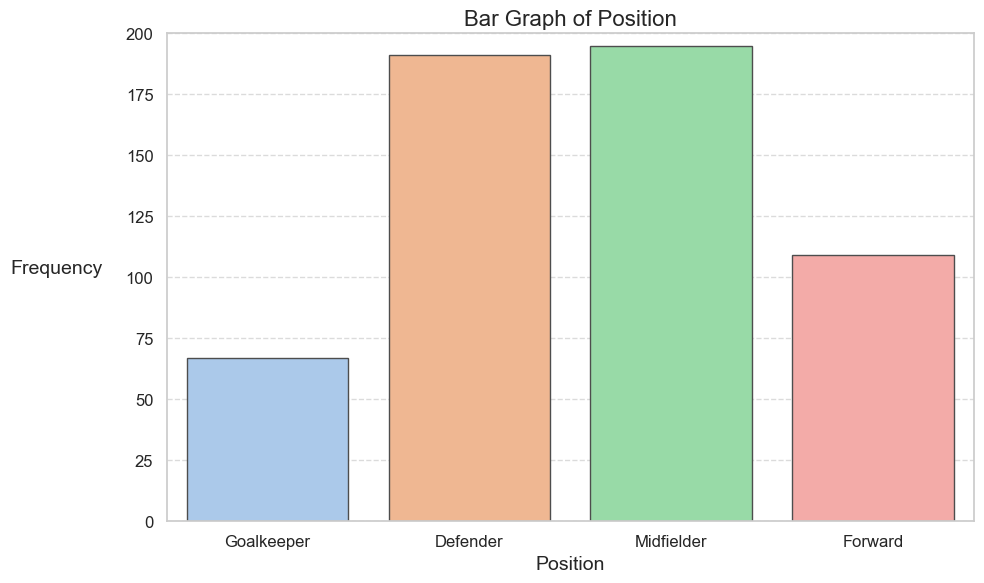

C:\Users\Kevin\AppData\Local\Temp\ipykernel_14896\4116151521.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




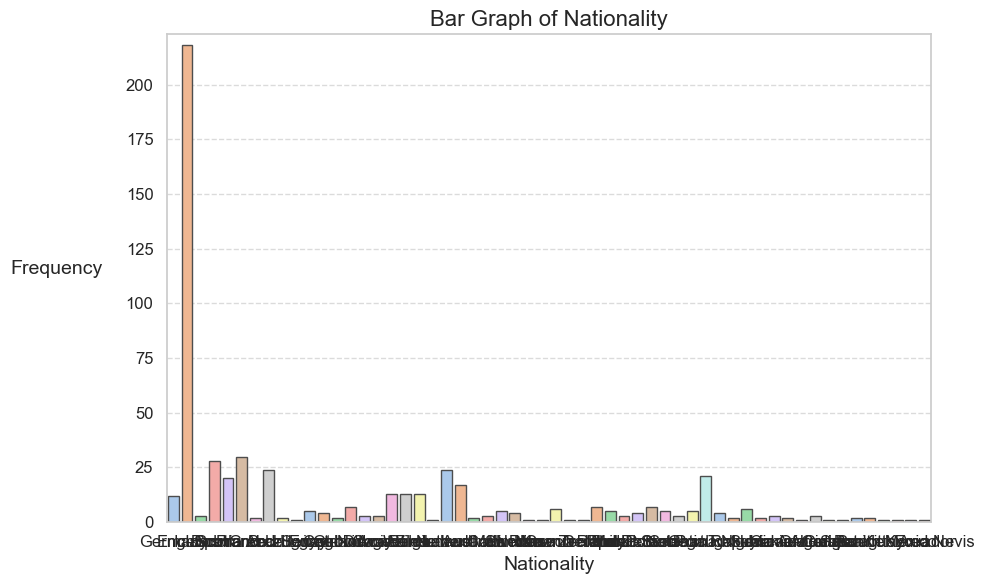

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# Improved bar graphs
for column in cat_list:
    plt.figure(figsize=(10, 6))

    # Get the maximum frequency for the current column
    max_freq = df[column].value_counts().max()

    sns.countplot(x=df[column], palette="pastel", edgecolor=".3")

    plt.title(f'Bar Graph of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14 , rotation=0, labelpad=50)
    plt.ylim(0, max_freq + 5)  # Set custom y-axis limit
    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()


In [187]:
#Step 1–2: Copy data and remove players with zero appearances.
#Step 3: Normalize raw stats by appearances.
#Step 4–5: Create subsets by position and filter for players with ≥ 38 games.
#Step 6: Do the same filtering on normalized stats for fair comparisons


features = df.columns
data_clean = df[features]
data_clean.head()

data_clean_appNonZero = data_clean[data_clean['Appearances'] > 0] #prevents division by zero for players who are yet to make appearances

# take care off the data type for division
# separate cols with dtype objects and cols that may not be divided by appearances

cols = features.drop(['Age', 'Name', 'Appearances', 'Club', 'Nationality', 'Jersey Number', 'Cross accuracy %', 'Position', 'Goals per match', 
                      'Passes per match','Tackle success %', 'Shooting accuracy %'])
print("Normalized columns per appearence")
print(cols)
data_clean_appNonZero[cols] = data_clean_appNonZero[cols].astype(float)
data_clean_appNonZero.loc[:, cols] = data_clean_appNonZero.loc[:, cols].div(
    data_clean_appNonZero['Appearances'], axis=0
)

# positional classifications on the data as is
goalies = df[df['Position'] == 'Goalkeeper']
defenders = df[df['Position'] == 'Defender']
midfielders = df[df['Position'] == 'Midfielder']
forwards = df[df['Position'] == 'Forward']

# palyers who have made atleast 38 games (a seasons worth games)
# data as is
data_38app = df[df['Appearances'] >=38]
goalies_38app = goalies[goalies['Appearances'] >= 38]
defenders_38app = defenders[defenders['Appearances'] >= 38]
midfilders_38app = midfielders[midfielders['Appearances'] >= 38]
forwards_38app = forwards[forwards['Appearances'] >= 38]

# palyers who have made atleast 38 games (a seasons worth games)
# data normalized
all_players = data_clean_appNonZero[data_clean_appNonZero['Appearances'] >= 38]
goalies_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Goalkeeper') & (data_clean_appNonZero['Appearances'] >= 38)]
defenders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Defender') & (data_clean_appNonZero['Appearances'] >= 38)]
midfielders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Midfielder') & (data_clean_appNonZero['Appearances'] >= 38)]
forwards_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Forward') & (data_clean_appNonZero['Appearances'] >= 38)]

Normalized columns per appearence
Index(['Wins', 'Losses', 'Goals', 'Headed goals', 'Goals with right foot',
       'Goals with left foot', 'Penalties scored', 'Freekicks scored', 'Shots',
       'Shots on target', 'Hit woodwork', 'Big chances missed', 'Clean sheets',
       'Goals conceded', 'Tackles', 'Last man tackles', 'Blocked shots',
       'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Passes',
       'Big chances created', 'Crosses', 'Through balls',
       'Accurate long balls', 'Saves', 'Penalties saved', 'Punches',
       'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs',
       'Goal Kicks', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides'],
      dtype='object')


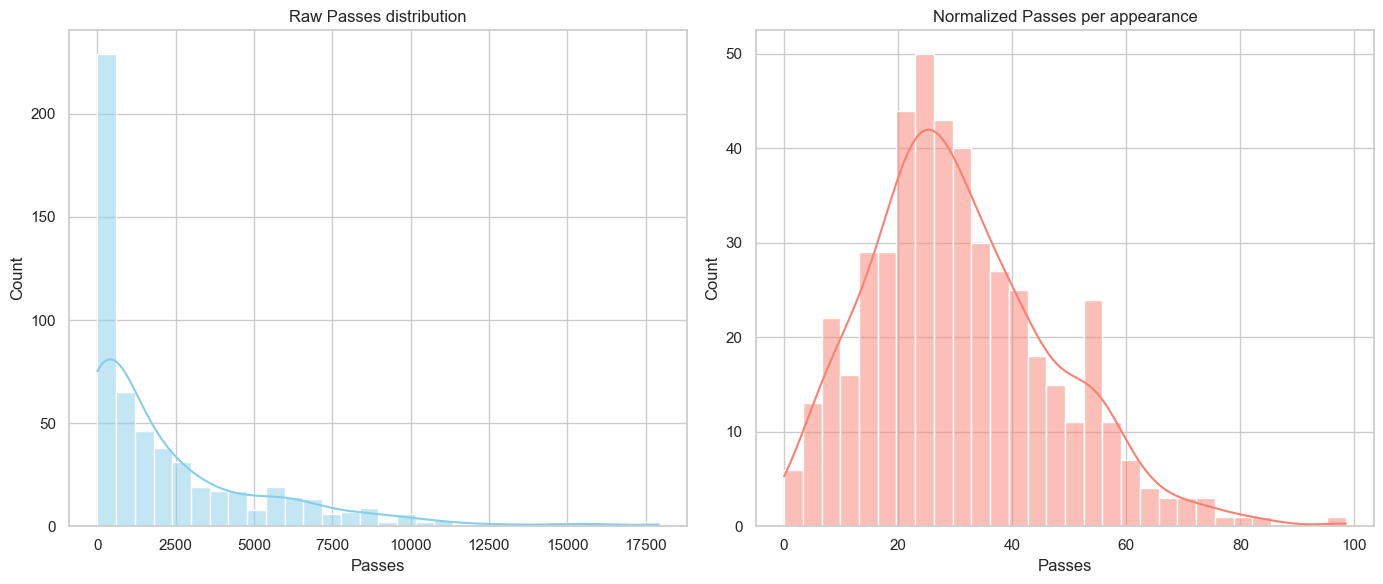

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick a feature to compare raw vs normalized
feature = "Passes"   # replace with any numeric column you normalized

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Raw distribution
sns.histplot(df[feature], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title(f"Raw {feature} distribution")

# Normalized distribution (per appearance)
sns.histplot(data_clean_appNonZero[feature], bins=30, kde=True, ax=axes[1], color="salmon")
axes[1].set_title(f"Normalized {feature} per appearance")

plt.tight_layout()
plt.show()

## example simple model to run
## predicts player position by stats

### Step 1: Prepare features and labels

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features: normalized numeric stats
X = all_players[cols]   # the normalized columns you created
y = all_players['Position']   # target variable

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 2: Scale features

In [190]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 3: Train a simple mode

In [191]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Step 4: Evaluate

In [192]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Defender       1.00      1.00      1.00        19
     Forward       1.00      1.00      1.00        10
  Goalkeeper       1.00      1.00      1.00         4
  Midfielder       1.00      1.00      1.00        24

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

